In [8]:
# Load packages
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

## Introduction

## Narration of Methods

In [9]:
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'

# creating temporary file to store zip file
temp <- tempfile()
download.file(url, temp)

# unzipping and reading in the csv file of interest
news_data <- read_csv(unz(temp, 'OnlineNewsPopularity/OnlineNewsPopularity.csv'))

# saving data table to the data file created
write_csv(news_data, 'data/news_data.csv', col_names=TRUE)

# unlinking files from temporary file created earlier
unlink(temp) 

news_data

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5,-0.1875,0.0,0.1875,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0,0.0000,0.5,0.0000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0,0.0000,0.5,0.0000,1500
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
http://mashable.com/2014/12/27/son-pays-off-mortgage/,8,10,442,0.5163551,1,0.6441281,24,1,12,⋯,0.1363636,0.5,-0.3564394,-0.8,-0.1666667,0.4545455,0.1363636,0.04545455,0.1363636,1900
http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.5394933,1,0.6926605,10,1,1,⋯,0.0625000,0.5,-0.2052455,-0.5,-0.0125000,0.0000000,0.0000000,0.50000000,0.0000000,1100
http://mashable.com/2014/12/27/youtube-channels-2015/,8,10,157,0.7019868,1,0.8461538,1,1,0,⋯,0.1000000,0.5,-0.2000000,-0.2,-0.2000000,0.3333333,0.2500000,0.16666667,0.2500000,1300


### Table 1 - Initial Untidy Dataframe

_____________________________________________________________________________________________________________________________

#### Reading in the data

The first step in the analysis was to read in the data from the UCI Machine Learning Repository. This was done by downloading the zip file, unzipping the folder to access the data set of interest, and saving the data as a data frame.

#### Description of data

The data set contains data regarding news articles from Mashable.com. Each row in the data frame corresponds to a specific news article, with many attributes given. THese include the number of images in the article and the number of times the article has been shared from the 



In [10]:
clean_news_data <- news_data %>%
    pivot_longer(cols = c(data_channel_is_lifestyle,
                data_channel_is_entertainment,
                data_channel_is_bus,
                data_channel_is_socmed,
                data_channel_is_tech,
                data_channel_is_world), 
                names_to = 'data_channel_type',
                values_to = 'na1') %>%
    pivot_longer(cols = c(weekday_is_monday,
                         weekday_is_tuesday,
                         weekday_is_wednesday,
                         weekday_is_thursday,
                         weekday_is_friday,
                         weekday_is_saturday,
                         weekday_is_sunday),
                names_to = 'weekday_posted',
                values_to = 'na2') %>%
    filter(na1==1 & na2==1) %>%


    mutate(data_channel_type = as_factor(data_channel_type)) %>%
    select(-na1, -na2, -is_weekend)


write_csv(clean_news_data, 'data/clean_news.csv', col_names=TRUE)
select(news_data, data_channel_is_lifestyle:data_channel_is_world)



data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0,0,0
0,0,1,0,0,0
0,0,1,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,0,0
0,0,0,0,0,1
0,1,0,0,0,0


### Table 2 - Specific Columns Violating the Tidy Data Rules

_____________________________________________________________________________________________________________________________

#### Cleaning and Wrangling Steps

The data did not fulfill the 3 requirements of clean data. Two of the columns did not correspond to a single variable. This was particulaarly a problem for the data channel variable as this was the class to be predicted by the classifier. The channel types were spread across 6 columns with 1's and 0's used to indicate what channel type the article corresponds to (see Table 2).


The pivot longer function was used to compress the 6 columns into one column named "data_channel_type", and the values were stored under temporary column named "na1". 

In [11]:
set.seed(1)

news_split <- initial_split(clean_news_data, prop=0.75, strata=data_channel_type)
news_training <- training(news_split)
news_testing <- testing(news_split)

In [12]:
num_obs <- news_training %>%
    group_by(data_channel_type) %>%
    summarize(n=n())
num_obs

`summarise()` ungrouping output (override with `.groups` argument)



data_channel_type,n
<fct>,<int>
data_channel_is_entertainment,5301
data_channel_is_bus,4703
data_channel_is_tech,5511
data_channel_is_lifestyle,1554
data_channel_is_world,6341
data_channel_is_socmed,1725


In [13]:
# fixing class imbalance, class imbalance exists, but need to know predictors


## Exploratory Analysis

In [14]:
columns_interest <- news_training %>%
    select(data_channel_type,num_imgs, self_reference_avg_sharess, num_hrefs, shares, global_rate_positive_words) %>%
    na.omit()
columns_interest

data_channel_type,num_imgs,self_reference_avg_sharess,num_hrefs,shares,global_rate_positive_words
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
data_channel_is_entertainment,1,496,4,593,0.04566210
data_channel_is_bus,1,0,3,711,0.04313725
data_channel_is_bus,1,918,3,1500,0.05687204
⋮,⋮,⋮,⋮,⋮,⋮
data_channel_is_tech,1,37033.33,9,1800,0.03757225
data_channel_is_socmed,3,2100.00,9,1900,0.03963415
data_channel_is_world,1,452.00,10,1100,0.02052786


no na values, and zeros make sense

`summarise()` ungrouping output (override with `.groups` argument)



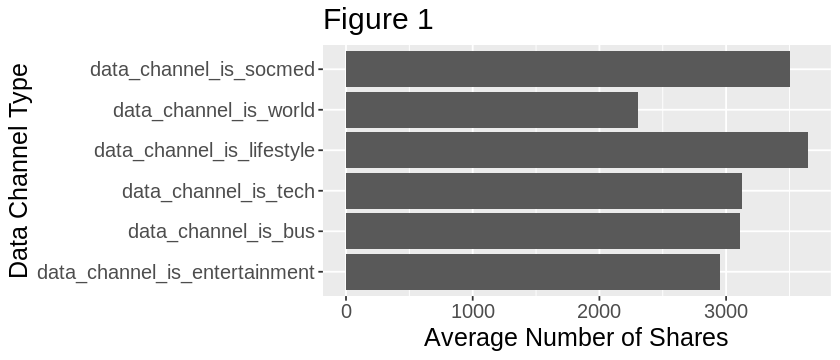

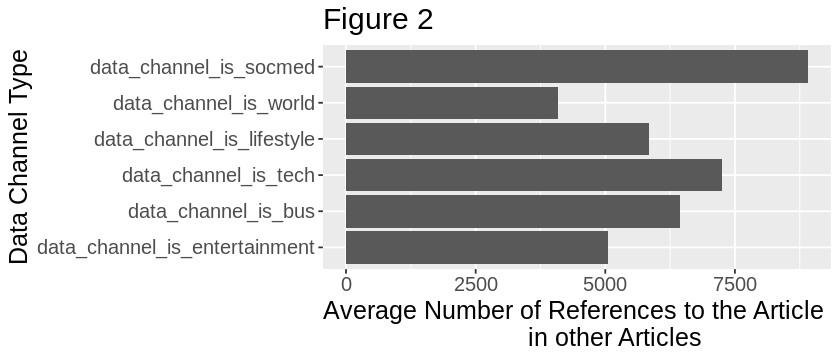

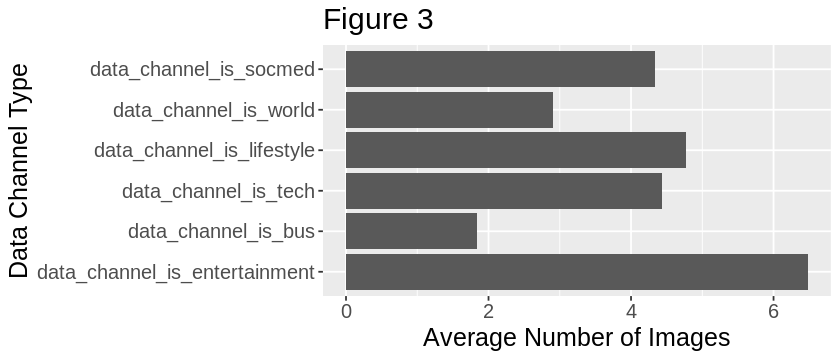

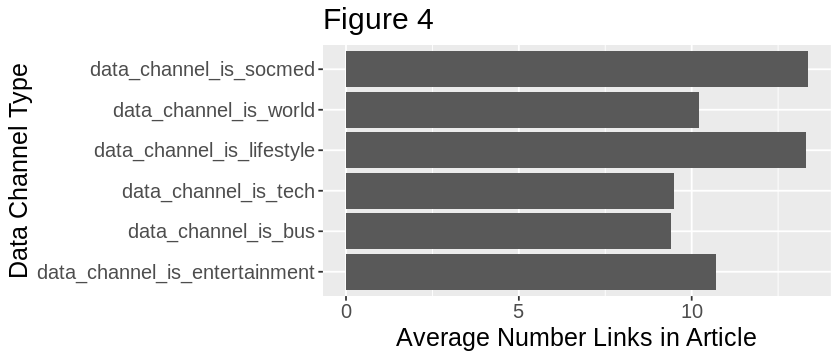

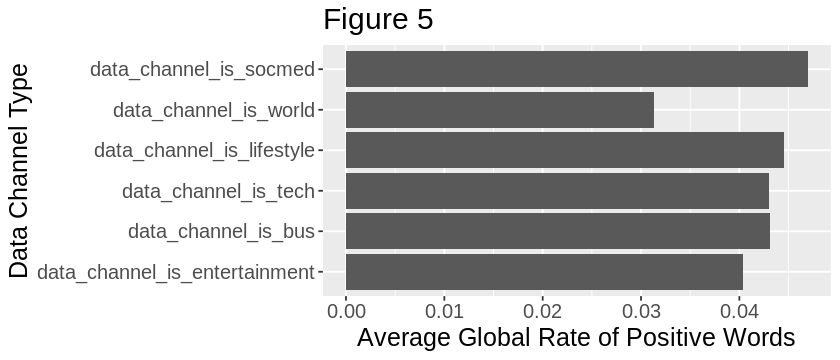

In [15]:
options(repr.plot.width = 7, repr.plot.height=3)

grouped_all <- columns_interest %>%
    group_by(data_channel_type) %>%
    summarize(avg_num_shares = mean(shares), avg_num_imgs = mean(num_imgs), 
              avg_num_ref = mean(self_reference_avg_sharess), avg_hrefs = mean(num_hrefs),
             avg_pos = mean(global_rate_positive_words))

viz_avgs_shares <- grouped_all %>%
    ggplot(aes(x=data_channel_type, y=avg_num_shares)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Data Channel Type', y='Average Number of Shares') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 1')
viz_avgs_shares
viz_avgs_self_refs <- grouped_all %>%
    ggplot(aes(x=data_channel_type, y=avg_num_ref)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Data Channel Type', y='Average Number of References to the Article 
            in other Articles ') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 2')
viz_avgs_self_refs
viz_avgs_imgs <- grouped_all %>%
    ggplot(aes(x=data_channel_type, y=avg_num_imgs)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Data Channel Type', y='Average Number of Images') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 3')
viz_avgs_imgs
viz_avgs_hrefs <- grouped_all %>%
    ggplot(aes(x=data_channel_type, y=avg_hrefs)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Data Channel Type', y='Average Number Links in Article') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 4')
viz_avgs_hrefs
viz_avgs_pos <- grouped_all %>%
    ggplot(aes(x=data_channel_type, y=avg_pos)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(x='Data Channel Type', y='Average Global Rate of Positive Words') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 5')
viz_avgs_pos

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


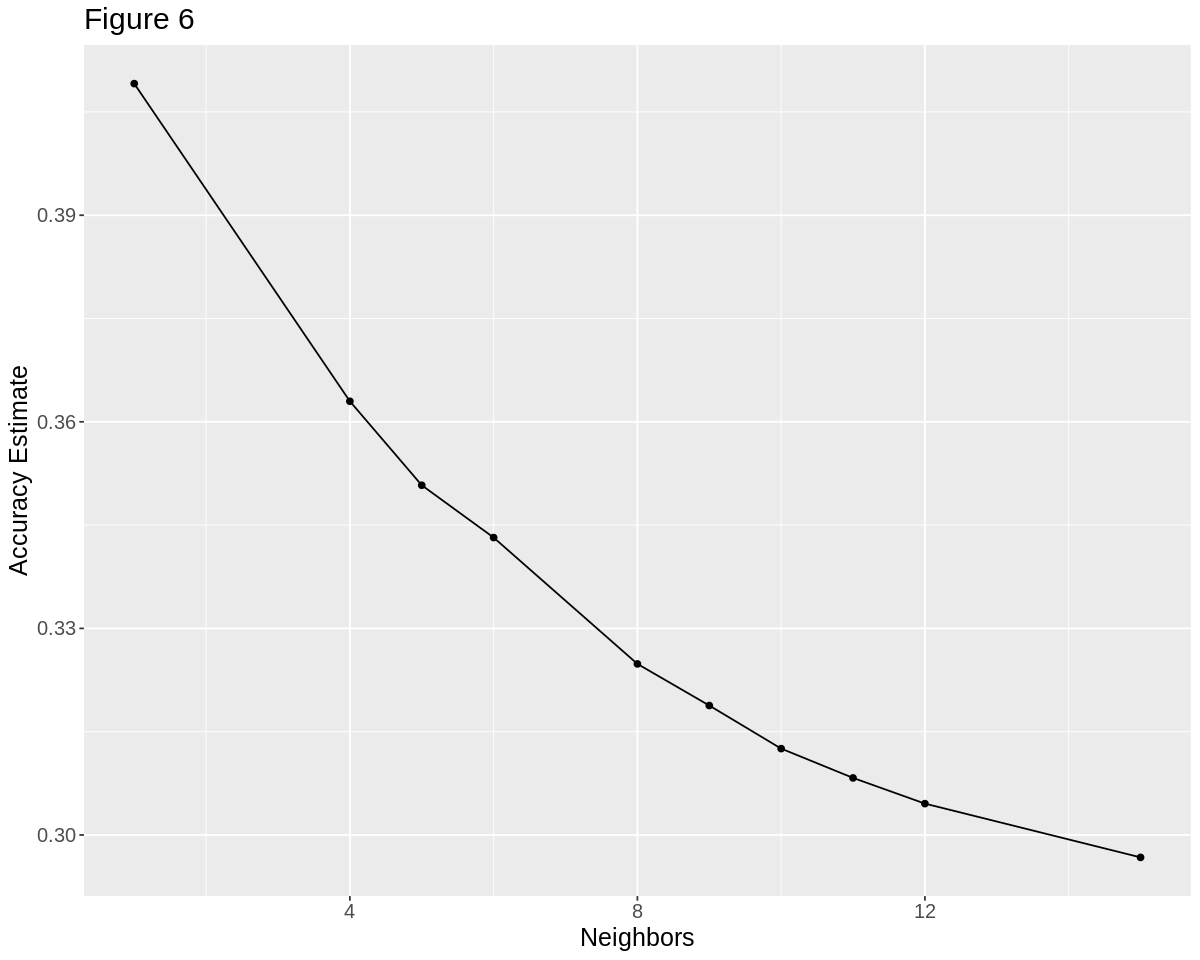

In [16]:
# creating classifier

knn_spec = nearest_neighbor(weight_func='rectangular', neighbors=tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification')

upsample_recipe <- recipe(data_channel_type ~ num_imgs + self_reference_avg_sharess, data = columns_interest) %>%
    step_upsample(data_channel_type, over_ratio = 1, skip = FALSE) %>%
    prep() %>%
    bake(columns_interest)


# upsampled_news <- bake(upsample_recipe, columns_interest)
#     upsampled_news %>%
#     group_by(data_channel_type) %>%
#     summarize(n = n())

news_recipe <- recipe(data_channel_type ~ num_imgs + self_reference_avg_sharess, data = upsample_recipe) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
        

news_vfold = vfold_cv(upsample_recipe, v=5,strata=data_channel_type)

knn_result <- workflow() %>%
    add_recipe(news_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples=news_vfold, grid=10) %>%
    collect_metrics()

accuracies <- knn_result %>%
    filter(.metric == "accuracy")
options(repr.plot.width = 10, repr.plot.height=8)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text=element_text(size=15))  +
    ggtitle('Figure 6')
    
accuracy_vs_k

    





In [17]:
# ask about grid and k value

In [ ]:
# building model with k=9

knn_spec2 <- nearest_neighbor(weight_func='rectangular', neighbors=9) %>%
    set_engine('kknn') %>%
    set_mode('classification')
knn_fit <- workflow() %>%
    add_recipe(news_recipe) %>%
    add_model(knn_spec2) %>%
    fit(upsample_recipe)
testing_cols <- news_testing %>%
    select(data_channel_type,num_imgs, self_reference_avg_sharess) %>%
    na.omit()
news_test_predictions <- predict(knn_fit, testing_cols) %>%
    bind_cols(testing_cols)

bake(news_test_predictions)

In [22]:
# getting accuracy

acc_metrics <- news_test_predictions %>%
    metrics(truth=data_channel_type, estimate=.pred_class)
    
acc_matrix <- news_test_predictions %>%
    conf_mat(truth=data_channel_type, estimate=.pred_class)

acc_metrics
#acc_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.21910448
kap,multiclass,0.04224071


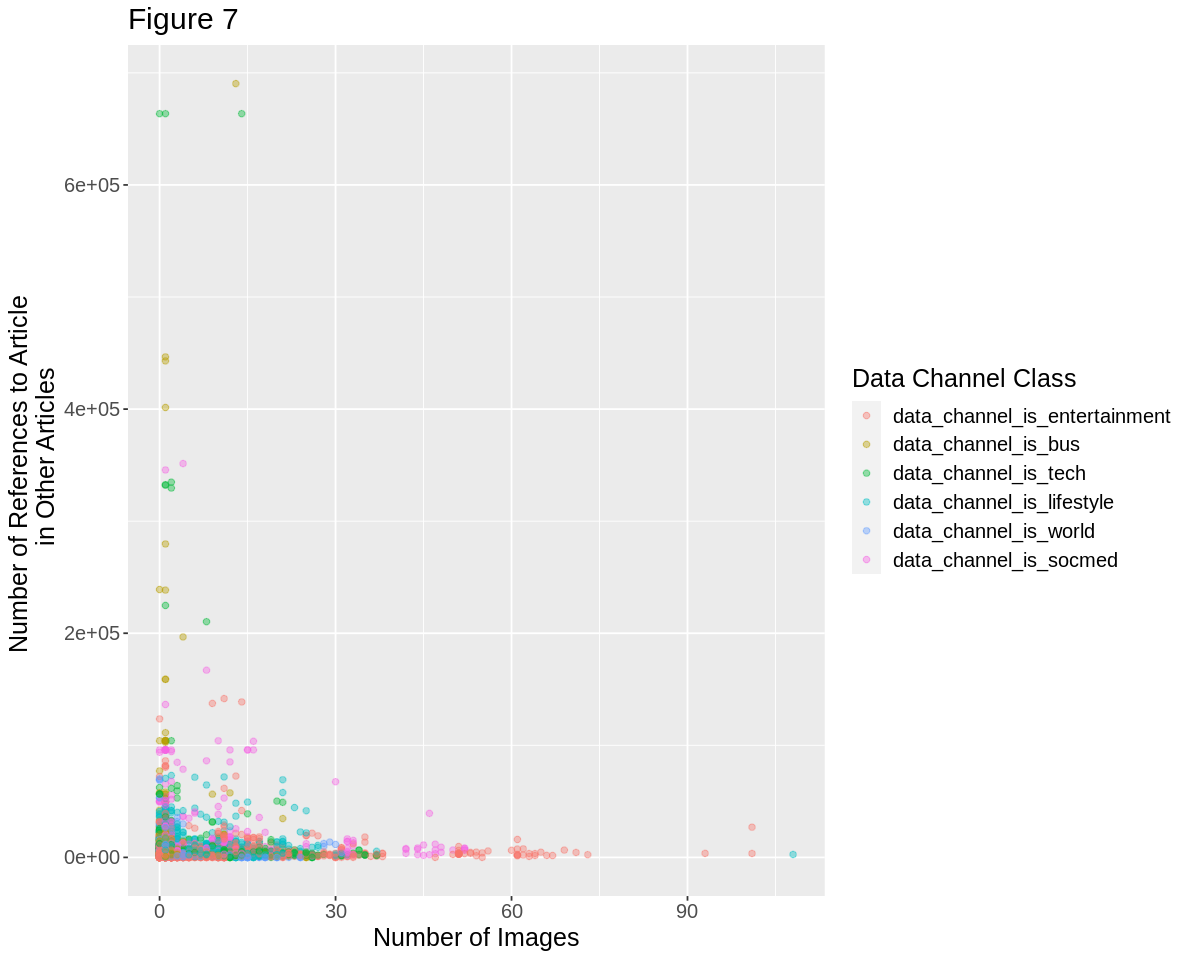

In [23]:
# plotting graph
options(repr.plot.width = 10, repr.plot.height=8)
predictions_plot <- ggplot(news_test_predictions, aes(x=num_imgs, y=self_reference_avg_sharess, color=.pred_class)) +
    geom_point(alpha=0.4) +
    labs(x='Number of Images', y='Number of References to Article 
    in Other Articles', color='Data Channel Class') +
    theme(text=element_text(size=15)) +
    ggtitle('Figure 7')
predictions_plot
